In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Missing data
missing_data = [features for features in data.columns if data[features].isnull().sum()>1]
missing_data
for feature in missing_data:
    print(feature, np.round(data[feature].isnull().mean(),4),' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [4]:
#finding features with numerical variables
numeric_data = [features for features in data.columns if data[features].dtype != 'O']
len(numeric_data)

38

In [5]:
#Finding year features in the data
year_data = [features for features in data.columns if 'Yr' in features or 'Year' in features]
year_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [6]:
#Finding distinct years in year_data
for feature in year_data:
    print(feature,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [9]:
discrete_data = [features for features in numeric_data if len(data[features].unique())<25 and features not in year_data+['Id']]
discrete_data

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

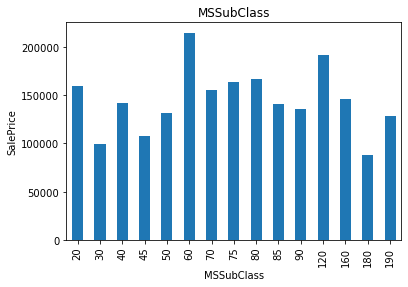

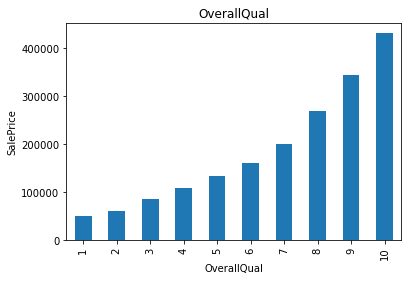

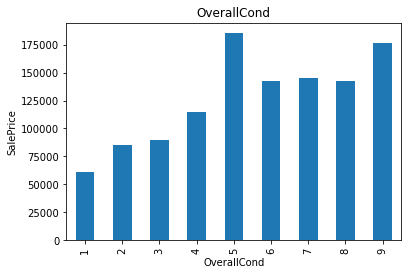

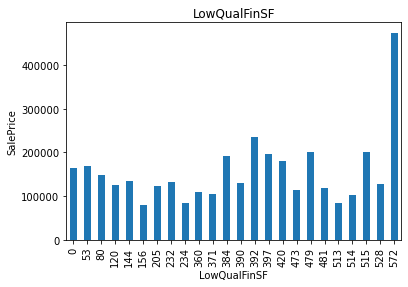

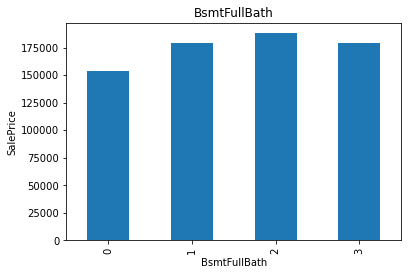

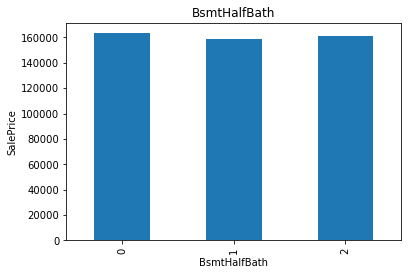

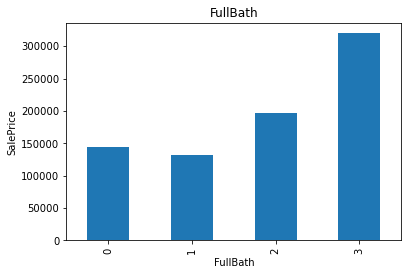

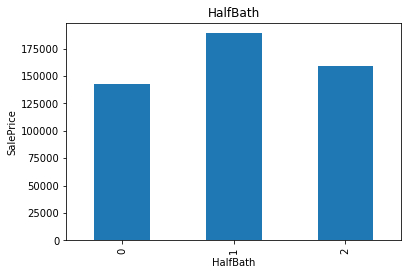

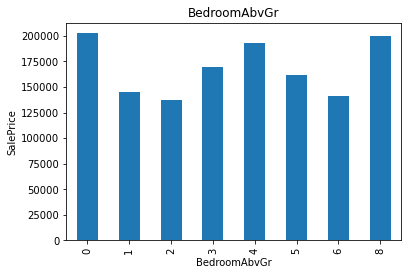

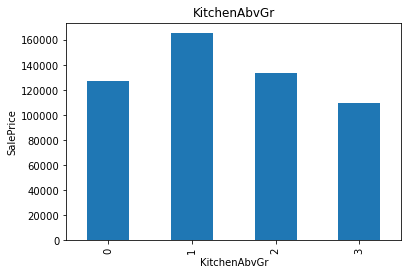

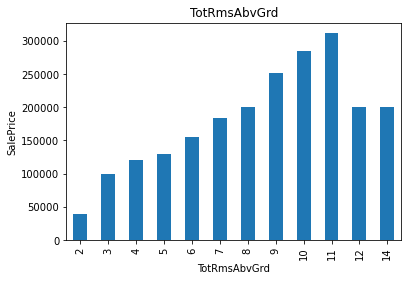

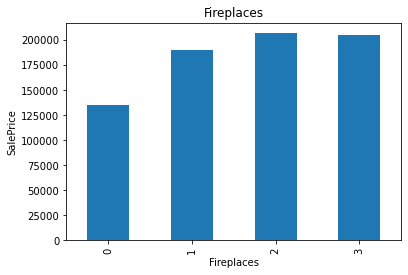

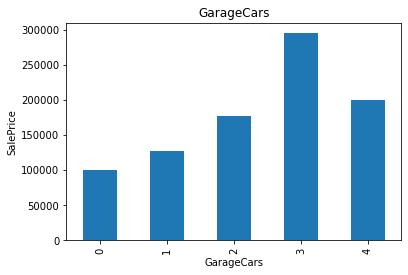

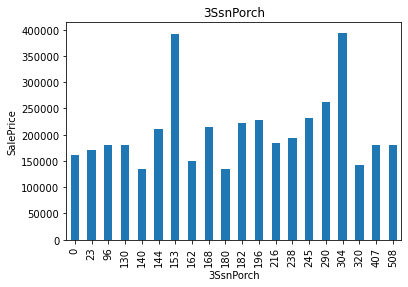

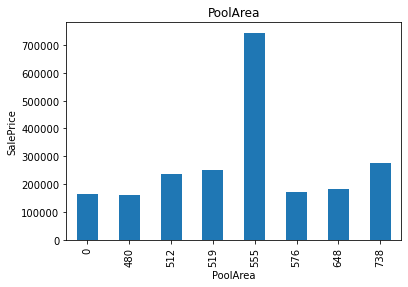

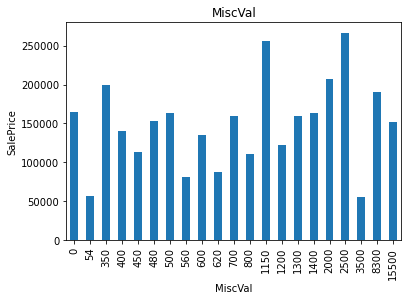

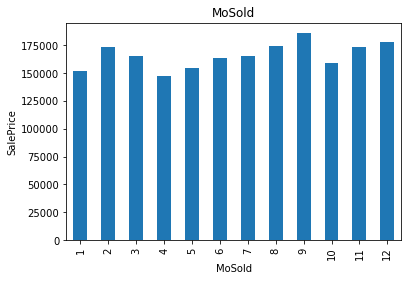

In [14]:
import matplotlib.pyplot as plt
for feature in discrete_data:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


In [18]:
continous_data = [features for features in numeric_data if features not in discrete_data+year_data+['Id']]
len(continous_data)

16

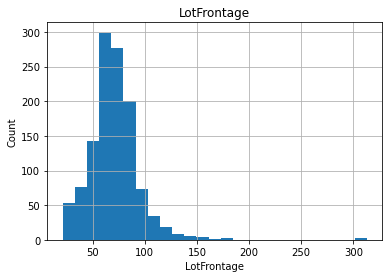

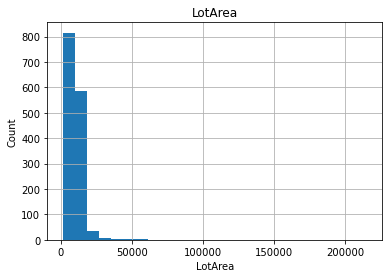

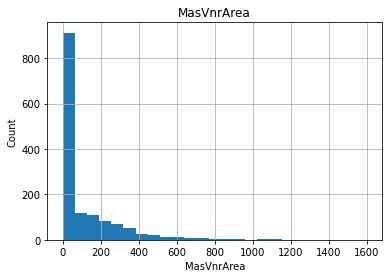

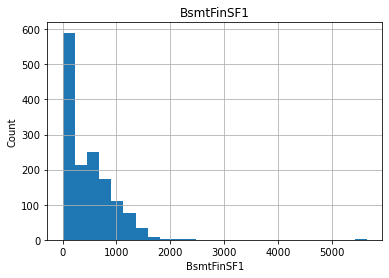

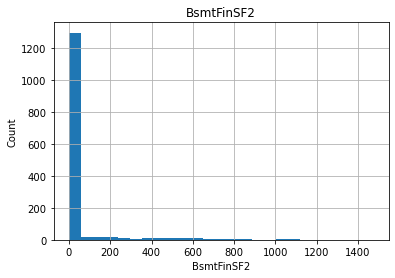

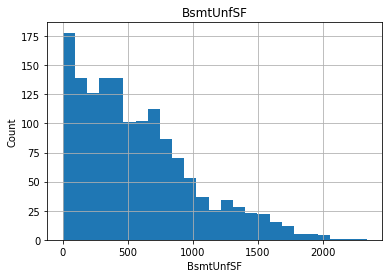

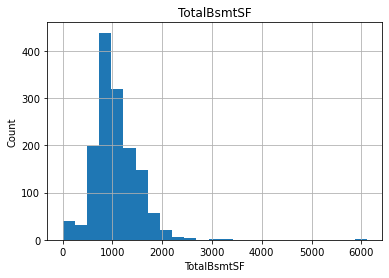

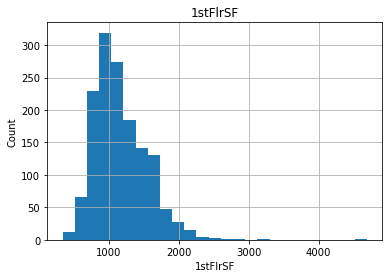

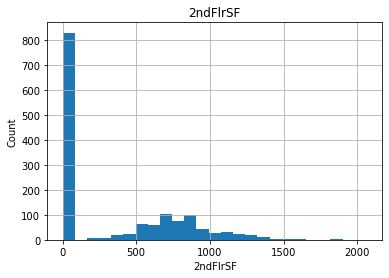

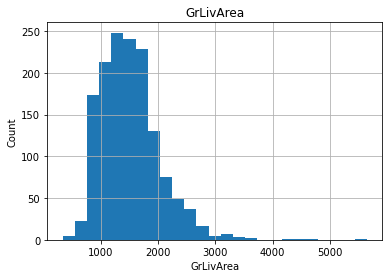

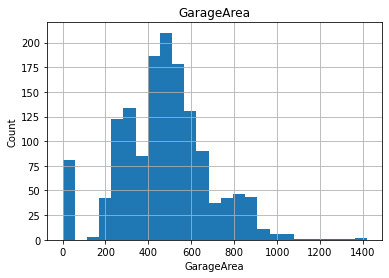

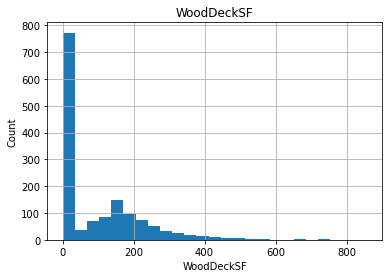

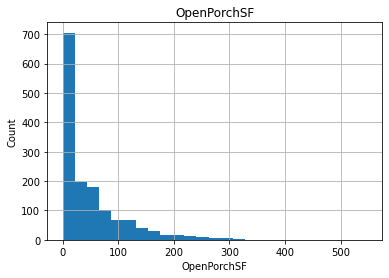

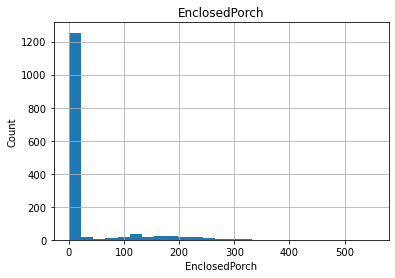

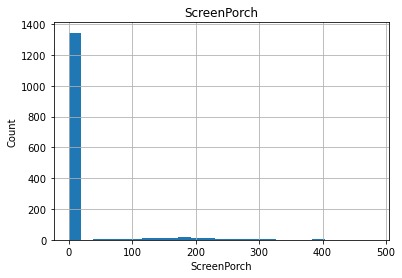

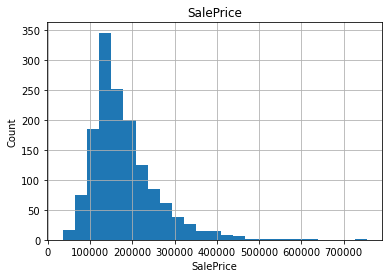

In [20]:
for features in continous_data:
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

## Feature Engineering

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,data['SalePrice'],test_size=0.1,random_state=0)

In [29]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [28]:
categorical_na = [features for features in data.columns if data[features].isnull().sum()>1 and data[features].dtype == 'O']
for feature in categorical_na:
    print('{}: {} %missing values'.format(feature,np.round(data[feature].isnull().mean(),4)))

Alley: 0.9377 %missing values
MasVnrType: 0.0055 %missing values
BsmtQual: 0.0253 %missing values
BsmtCond: 0.0253 %missing values
BsmtExposure: 0.026 %missing values
BsmtFinType1: 0.0253 %missing values
BsmtFinType2: 0.026 %missing values
FireplaceQu: 0.4726 %missing values
GarageType: 0.0555 %missing values
GarageFinish: 0.0555 %missing values
GarageQual: 0.0555 %missing values
GarageCond: 0.0555 %missing values
PoolQC: 0.9952 %missing values
Fence: 0.8075 %missing values
MiscFeature: 0.963 %missing values


In [30]:
data[categorical_na] = data[categorical_na].fillna('Missing')

In [32]:
data[categorical_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
continous_na = [features for features in data.columns if data[features].isnull().sum()>1 and data[features].dtype != 'O']
print(continous_na)
for feature in continous_na:
    print('{}: {} % missing values'.format(feature,np.around(data[feature].isnull().mean(),4)))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
LotFrontage: 0.1774 % missing values
MasVnrArea: 0.0055 % missing values
GarageYrBlt: 0.0555 % missing values


In [35]:
for feature in continous_na:
    feature_median = data[feature].median()
    data[feature].fillna(feature_median,inplace = True)

In [36]:
data[continous_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [39]:
categorical_data = [feature for feature in data.columns if data[feature].dtype == 'O']

In [45]:
for feature in categorical_data:
    ordered_labels = data.groupby(feature)['SalePrice'].mean().sort_values().index
    ordered_labels={k:i for i,k in enumerate(ordered_labels,0)}
    data[feature]=data[feature].map(ordered_labels)

In [46]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,0,1,1,...,0,0,4,3,0,2,2008,4,4,208500
1,2,20,3,80.0,9600,1,2,0,1,1,...,0,0,4,3,0,5,2007,4,4,181500
2,3,60,3,68.0,11250,1,2,1,1,1,...,0,0,4,3,0,9,2008,4,4,223500
3,4,70,3,60.0,9550,1,2,1,1,1,...,0,0,4,3,0,2,2006,4,1,140000
4,5,60,3,84.0,14260,1,2,1,1,1,...,0,0,4,3,0,12,2008,4,4,250000


In [47]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    data[feature]=np.log(data[feature])

In [48]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,3,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,3,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,3,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,3,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,3,0,12,2008,4,4,12.429216


In [50]:
pip install dtale 

Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns
data1 = sns.load_dataset('titanic')

In [53]:
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
import dtale
dtale.show(data1)


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=0111d1f011be36ac51a45d1e3746e5e23389ca20cb4da7615293da58fc400cf4
  Stored in directory: c:\users\praveen\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107415 sha256=c054295a77eba35cbec715b3ba2adbc16aa009d8250967e0c91c15aa9f1f4df0
  Stored in directory: c:\users\praveen\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik


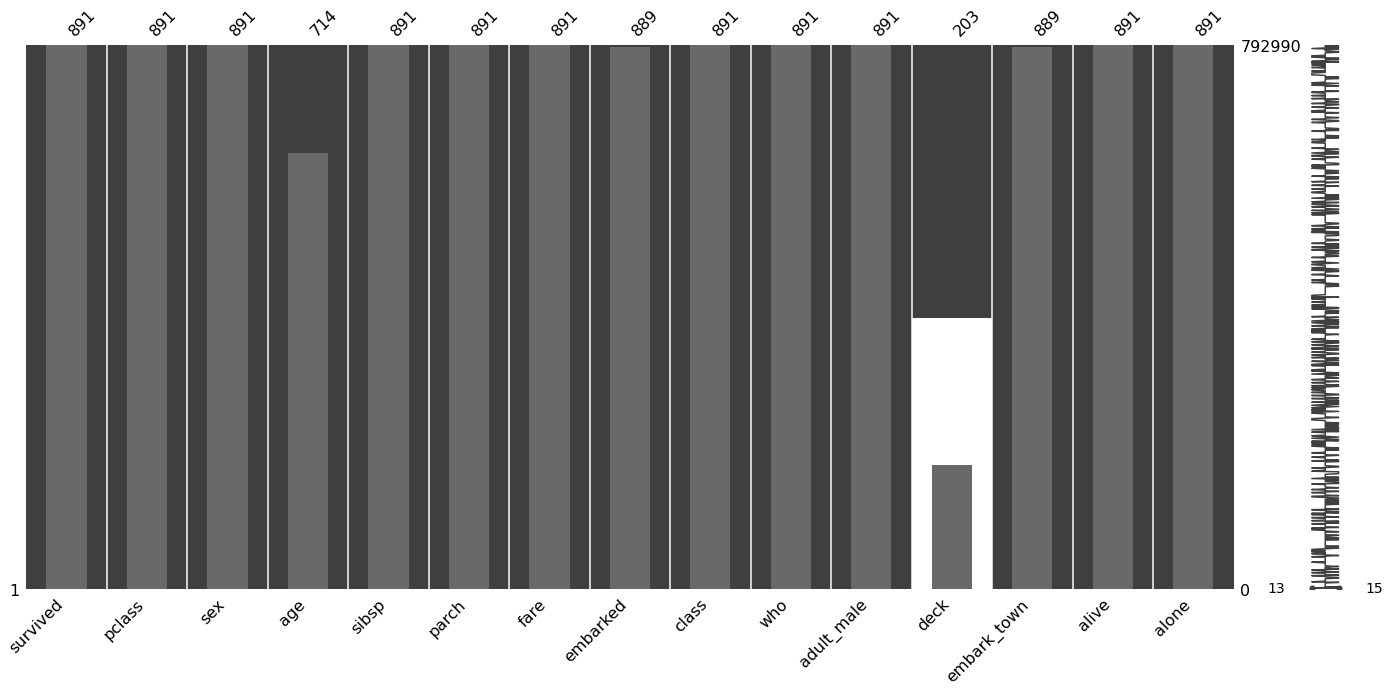

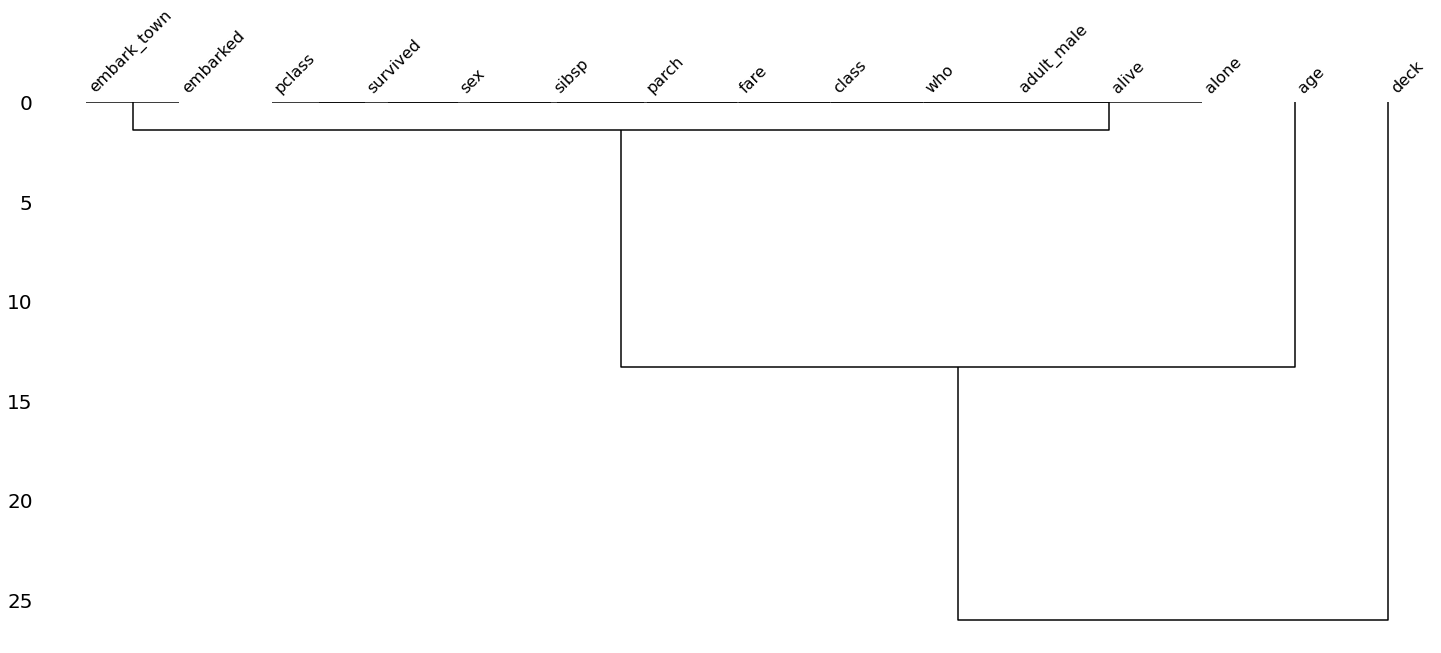

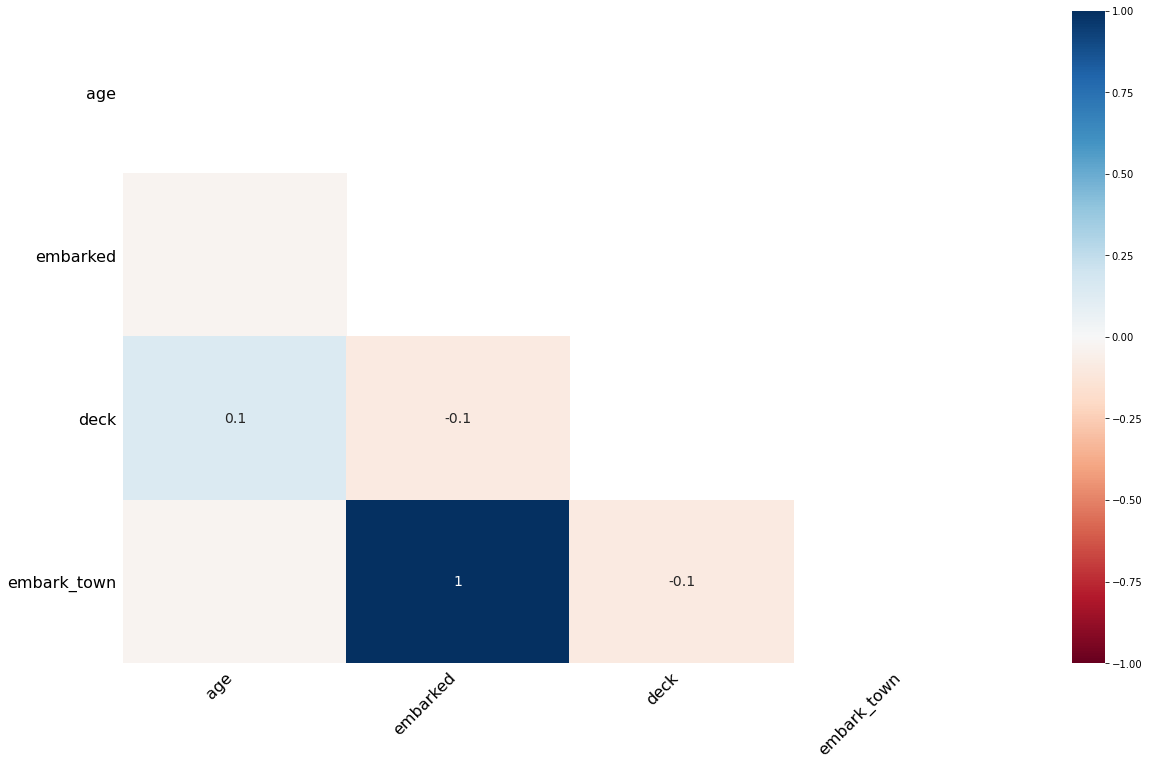

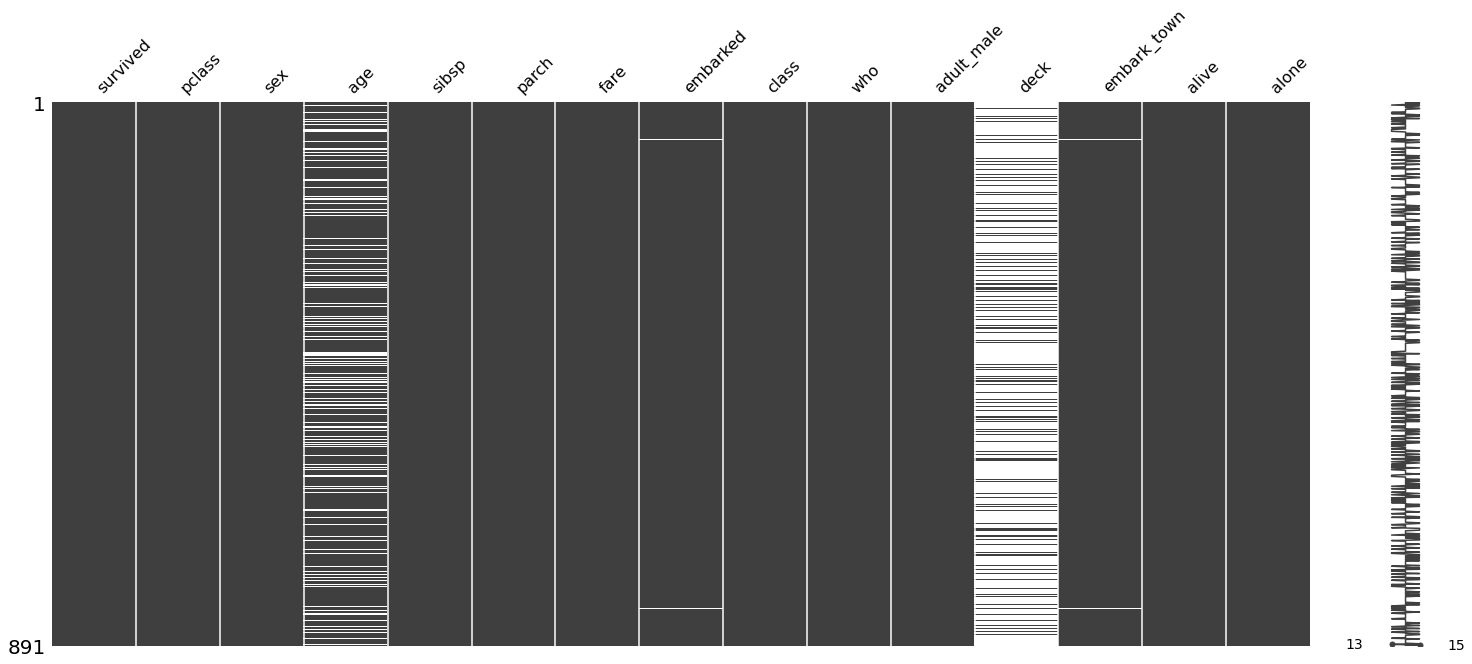

In [56]:
pip install pandas-profiling

In [57]:
data2 = sns.load_dataset('tips')

In [61]:
#from pandas-profiling import ProfileReport
from pandas-profiling import ProfilrReport
profile = ProfileReport(data2,explorative = True)
profile.to_file('output.html')

SyntaxError: invalid syntax (<ipython-input-61-80cd993a16fb>, line 2)